<a href="https://colab.research.google.com/github/koseosmanturker/Human_Emotion_Detection/blob/main/emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import os
import tensorflow as tf
import keras
import cv2

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [25]:
from google.colab import files

# Upload the kaggle.json file
uploaded = files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!pip install kaggle

!kaggle datasets download -d msambare/fer2013

!unzip fer2013.zip

In [3]:
train_path = "/content/train"
test_path = "/content/test"

In [4]:
def preprocess_data(image_folder_path):
    images = []
    labels = []
    emotions = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
    for emotion_folder in os.listdir(image_folder_path):
        emotion_label = emotions[emotion_folder]
        for image_filename in os.listdir(os.path.join(image_folder_path, emotion_folder)):
            image_path = os.path.join(image_folder_path, emotion_folder, image_filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (48, 48))
            image = image / 255.0
            images.append(image)
            labels.append(emotion_label)
    return np.array(images), to_categorical(np.array(labels))

X1, Y1 = preprocess_data(train_path)
X2, Y2 = preprocess_data(test_path)

X = np.concatenate((X1, X2), axis=0)
Y = np.concatenate((Y1, Y2), axis=0)

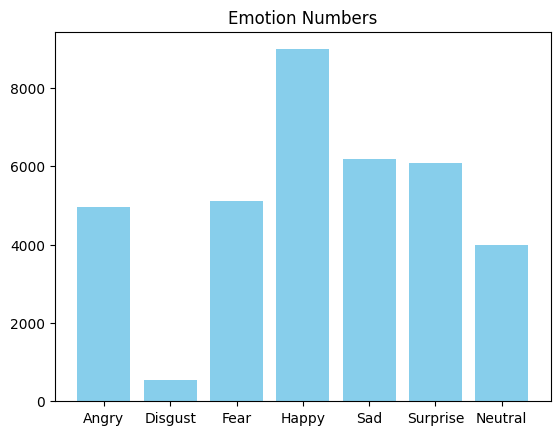

In [5]:
num_samples_per_class = np.sum(Y, axis=0)

emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
counts = num_samples_per_class

plt.bar(emotions, counts, color='skyblue')
plt.title('Emotion Numbers')
plt.show()

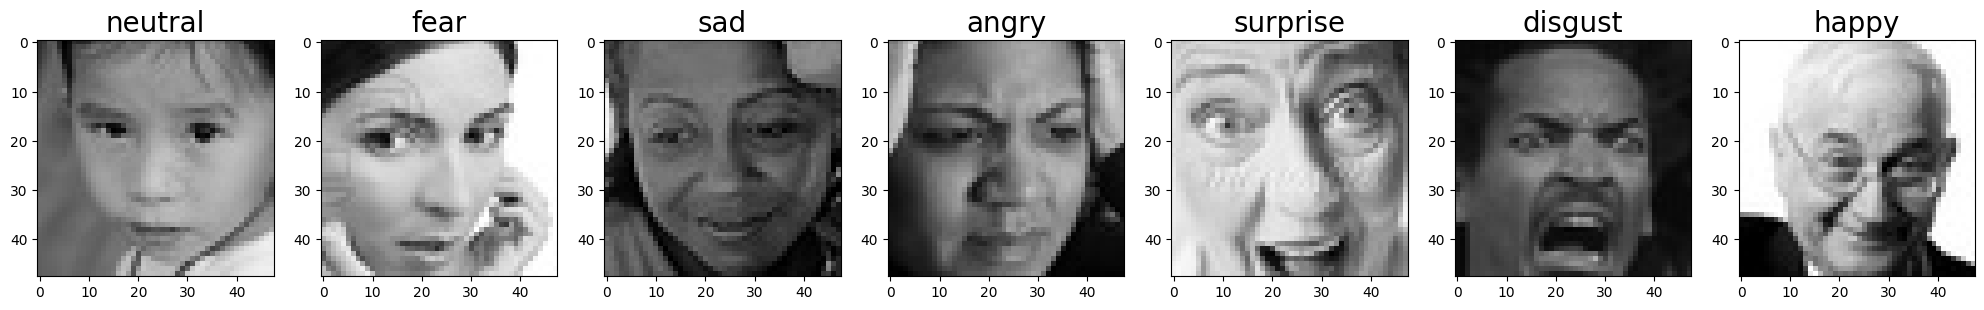

In [6]:
plt.style.use('default')
plt.figure(figsize = (25, 8))
image_count = 1
train_path = train_path + "/"

for directory in os.listdir(train_path):
    if directory[0] != '.':
        for i, file in enumerate(os.listdir(train_path + directory)):
            if i == 1:
                break
            else:
                fig = plt.subplot(1, 7, image_count)
                image_count += 1
                image = cv2.imread(train_path + directory + '/' + file)
                plt.imshow(image)
                plt.title(directory, fontsize = 20)

In [7]:
X_train = X[:28709]
Y_train = Y[:28709]
X_test = X[28709:32298]
Y_test = Y[28709:32298]
X_val = X[32298:]
Y_val = Y[32298:]
print("Length of X_train: ", len(X_train))
print("Length of X_test: ", len(X_test))
print("Length of X_val: ", len(X_val))

Length of X_train:  28709
Length of X_test:  3589
Length of X_val:  3589


In [23]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(256,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))

#Output
model.add(Flatten())


model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
results = model.fit(X_train, Y_train, batch_size=64, epochs=30, validation_data = (X_val, Y_val))

Epoch 1/30
449/449 [==============================] - 12s 22ms/step - loss: 1.6771 - accuracy: 0.3410 - val_loss: 1.6805 - val_accuracy: 0.4299
Epoch 2/30
449/449 [==============================] - 9s 21ms/step - loss: 1.4314 - accuracy: 0.4514 - val_loss: 1.2190 - val_accuracy: 0.5910
Epoch 3/30
449/449 [==============================] - 9s 21ms/step - loss: 1.3340 - accuracy: 0.4914 - val_loss: 1.0295 - val_accuracy: 0.6381
Epoch 4/30
449/449 [==============================] - 9s 20ms/step - loss: 1.2590 - accuracy: 0.5176 - val_loss: 0.9975 - val_accuracy: 0.6570
Epoch 5/30
449/449 [==============================] - 9s 21ms/step - loss: 1.2125 - accuracy: 0.5351 - val_loss: 0.9529 - val_accuracy: 0.6679
Epoch 6/30
449/449 [==============================] - 9s 21ms/step - loss: 1.1702 - accuracy: 0.5541 - val_loss: 0.9195 - val_accuracy: 0.6835
Epoch 7/30
449/449 [==============================] - 9s 21ms/step - loss: 1.1256 - accuracy: 0.5692 - val_loss: 0.9175 - val_accuracy: 0.691

In [15]:
model.evaluate(X_test, Y_test)

113/113 [==============================] - 1s 8ms/step - loss: 1.5086 - accuracy: 0.5272


[1.5085780620574951, 0.5271663665771484]

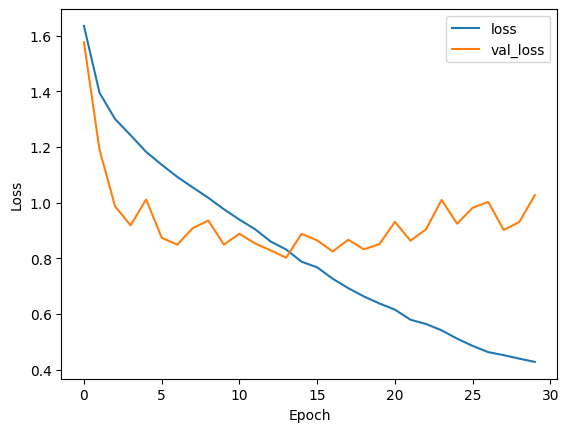

In [12]:
# Plot the the training loss
plt.plot(results.history["loss"], label = "loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label = "val_loss" )

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")
# Put legend table
plt.legend()

# Show the plot
plt.show()

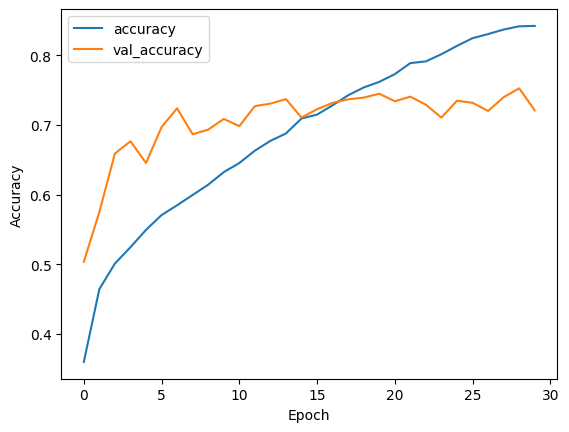

In [13]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label = "accuracy")

# Plot the the validation accuracy
plt.plot(results.history['val_accuracy'], label = "val_accuracy")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Put legend table
plt.legend()

# Show the plot
plt.show()

1/1 [==============================] - 0s 148ms/step


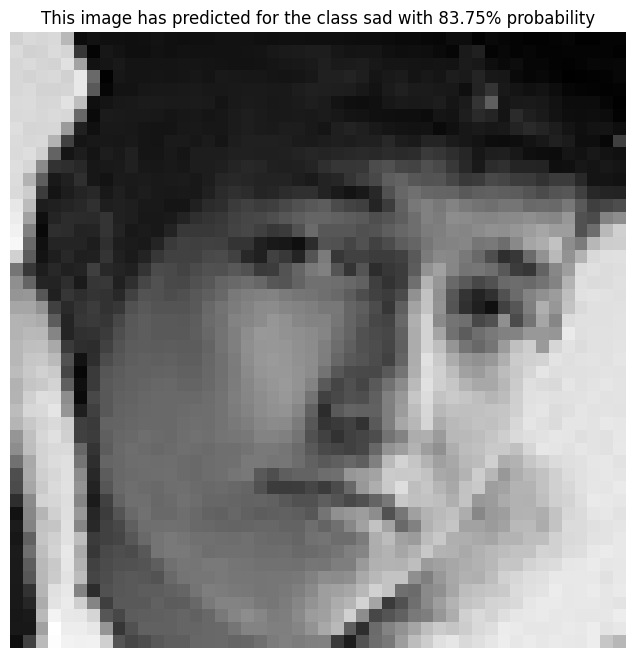

1/1 [==============================] - 0s 30ms/step


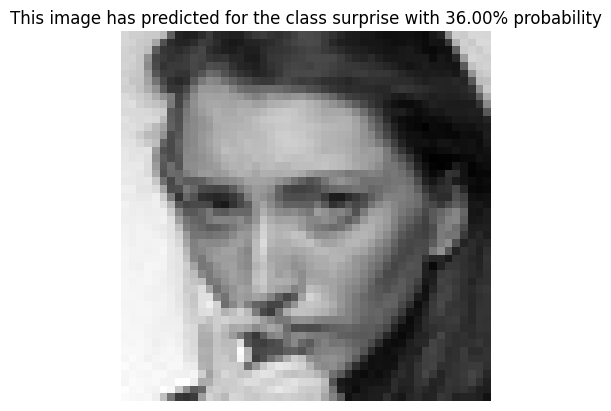

1/1 [==============================] - 0s 28ms/step


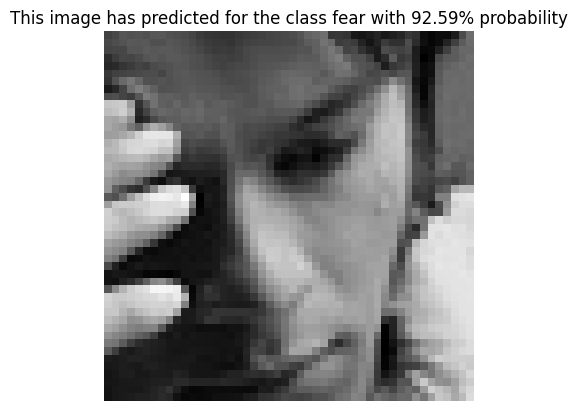

1/1 [==============================] - 0s 19ms/step


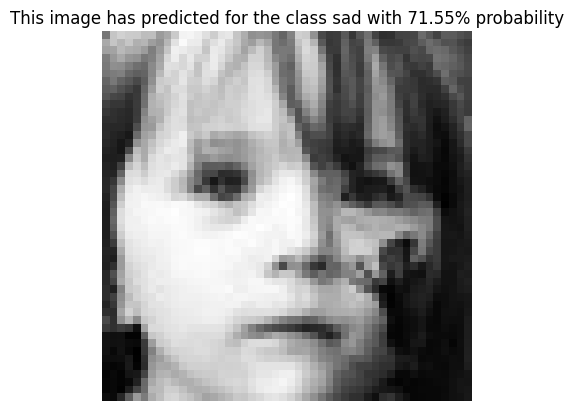

1/1 [==============================] - 0s 20ms/step


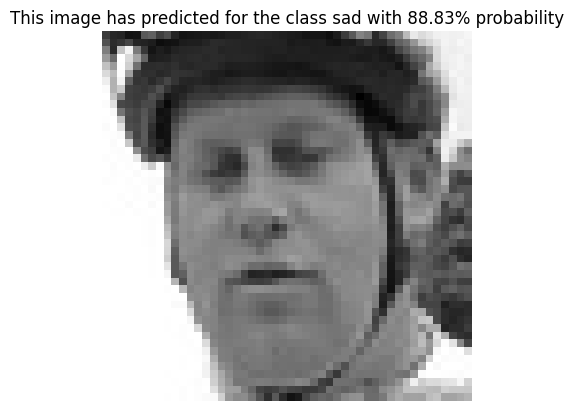

In [25]:
import random

number_of_random_images = 5
random_indices = random.sample(range(len(X_test)), number_of_random_images)

emotion_classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
plt.style.use('default')
plt.figure(figsize = (25, 8))
for idx in random_indices:
    image_to_predict = X_test[idx].reshape(1, 48, 48, 1)
    prediction_result = model.predict(image_to_predict)

    predicted_class = prediction_result.argmax()
    predicted_probability = prediction_result.max()
    predicted_emotion = emotion_classes[predicted_class]

    image_to_show = X_test[idx].reshape(48, 48)
    plt.imshow(image_to_show, cmap='gray')
    plt.title(f"This image has predicted for the class {predicted_emotion} with {predicted_probability*100:.2f}% probability")
    plt.axis('off')
    plt.show()